In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
np.random.seed(42)
from matplotlib import style
style.use('ggplot')

Simulating Chuck a Luck
"Pay a Buck and Chuck-a-Luck"
Chuck-a-Luck is a game of chance often associated with charity fundraisers or street gambling rather than casinos.

To play, the House says, "Pay $1, pick a number and roll 3 dice. If any of those dice come up, you'll win $1, $2, or $3".

"It's even odds", they say, "because the probability of rolling your number is 1/6 and you get to roll 3 dice! 1/6 + 1/6 + 1/6 is 3/6 which is 1/2".

You know better than this, so it's time to make an experiment to approximate the actual risk and payoff...

Rules:

The player pays $1 to play and picks a number.

The House rolls 3 dice at once.

Payouts:

$3 if all three dice match the chosen number
$2 if exactly two dice match the chosen number
$1 is exactly one of the dice matches the chosen number
If none of the dice match the player's chosen number, then the House keeps the $1.

Exercises:



What are your chances of getting an outcome payout of $2? (where we earned $3 on the $1 ante)


In [2]:
def probabily_of_roll(simulations = 100_000, n_rolls = 3, sides = 6, number = 3, matches = 3):
    rolls = pd.DataFrame(np.random.randint(1, sides+1, size=(simulations,n_rolls)))
    #sum the row for specifie number and average the times it equals the max
    return (rolls[rolls == number].sum(axis=1)==(number*matches)).mean()


In [3]:
probabily_of_roll()

0.00416


What are your chances of getting an payout of $1?


In [4]:
probabily_of_roll(matches = 2)

0.06952


What are your chances of getting a payout of $0 where you ante $1 and win $1?


In [5]:
probabily_of_roll(matches = 1)

0.34627


What are your chances of getting a payout of -$1 where you ante up, but don't win anything?


In [6]:
probabily_of_roll(matches = 0)

0.57775


What is the average cost/gain per game? (think of averaging the total payout calculation across all simulations)


In [45]:
def profit_from_roll(simulations = 10_000, n_rolls = 3, sides = 6, number = 3):
    rolls = pd.DataFrame(np.random.randint(1, sides+1, size=(simulations,n_rolls)))
    #count the matches, sum and average, subract orginal payment
    return (rolls[rolls == number].sum(axis=1)/number).mean()-1

In [63]:
profit_from_roll()

-0.4877

In [75]:
#keep the df from the above function
def profit_df(simulations = 10_000, n_rolls = 3, sides = 6, number = 3):
    rolls = pd.DataFrame(np.random.randint(1, sides+1, size=(simulations,n_rolls)))
    #count the matches, sum and average, subract orginal payment
    return (rolls[rolls == number].sum(axis=1)/number-1)


Chart out a histogram of all the outcomes of those 1,000,000 games


In [91]:
outcomes = profit_df(1_000_000)

Text(0.5, 0, 'profit')

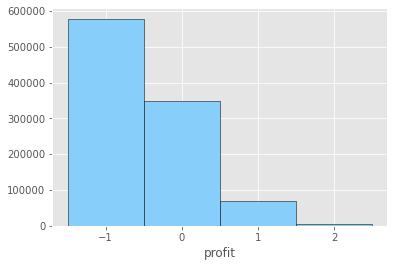

In [90]:
f, bins = np.histogram(outcomes, bins=[-1,0,1,2,3])

plt.bar(bins[:-1], f, width=1, color='lightskyblue', edgecolor='black')
plt.xticks([-1, 0, 1, 2])
plt.xlabel('profit')
#plt.bar([-1,0,1,2], width=1, color='lightskyblue', edgecolor='black')
#plt.xticks([-1, 0, 1, 2])



Is this really a fair game of 1/6 + 1/6 + 1/6 odds?


In [83]:
#chance of winning $2
(1/6) * (1/6) * (1/6)


0.004629629629629629

In [84]:
# chance of winning $1
(1/6) * (1/6) * (5/6)

0.023148148148148147

In [85]:
# chance of breaking even
(1/6) * (5/6) * (5/6)

0.11574074074074076

In [87]:
# chance of losing $1
(5/6) * (5/6) * (5/6)
#58% chance of losing

0.5787037037037038


If you play 1,000,000 games in a row, what are your winnings/losses?

In [92]:
profit_from_roll(1_000_000)

-0.49993600000000005